In [1]:
%load_ext Cython

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [171]:
def plot_city(matrix):
    
    plt.matshow(matrix, vmin = 0, vmax = 1, cmap = 'Greys')
#     plt.show()

In [70]:
def count_neighbours(grid, row, col):
    count = 0
    for x, y in (
            (row - 1, col), (row + 1, col), (row, col - 1),
            (row, col + 1), (row - 1, col - 1), (row - 1, col + 1),
            (row + 1, col - 1), (row + 1, col + 1)):
        if not (0 <= x < len(grid) and 0 <= y < len(grid[x])):
            # out of bounds
            continue
        if grid[x][y] == 1:
            count += 1
    return count

In [165]:
def timestep(matrix):
    
    next_matrix = copy.deepcopy(matrix)
    
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            neighbours_count = count_neighbours(matrix, i, j)
            prob_urban = neighbours_count/9
            
            if random.random() < prob_urban:
                next_matrix[i, j] = 1
                
    return next_matrix

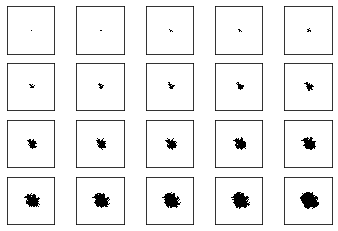

In [184]:
city = np.zeros((50, 50))

steps = 20

# initial house
city[25, 25] = 1

for i in range(steps):
    city = timestep(city)
    plt.subplot(4, 5, i + 1)
    fig = plt.imshow(city, vmin = 0, vmax = 1, cmap = 'Greys')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

plt.show()